# Imports

In [63]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context(context='talk')
plt.rcParams['figure.figsize'] = [16,8]

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import month_plot

from statsmodels.tsa.stattools import adfuller

# Datasets

In [40]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "rb" ))

# Time Series Analysis

In [18]:
df_flu_pre_COVID.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2015-09-05 to 2020-02-29
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  235 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [19]:
df_flu_COVID.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142 entries, 2020-03-07 to 2022-11-19
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  142 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [20]:
df_flu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 2015-09-05 to 2022-12-03
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  378 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


In [42]:
df_flu.dropna(inplace=True)

In [22]:
df_flu.describe()

,Total Cases
count,378.000000
mean,752.111111
std,1280.766037
min,0.000000
25%,10.000000
50%,57.000000
75%,971.000000
max,7773.000000


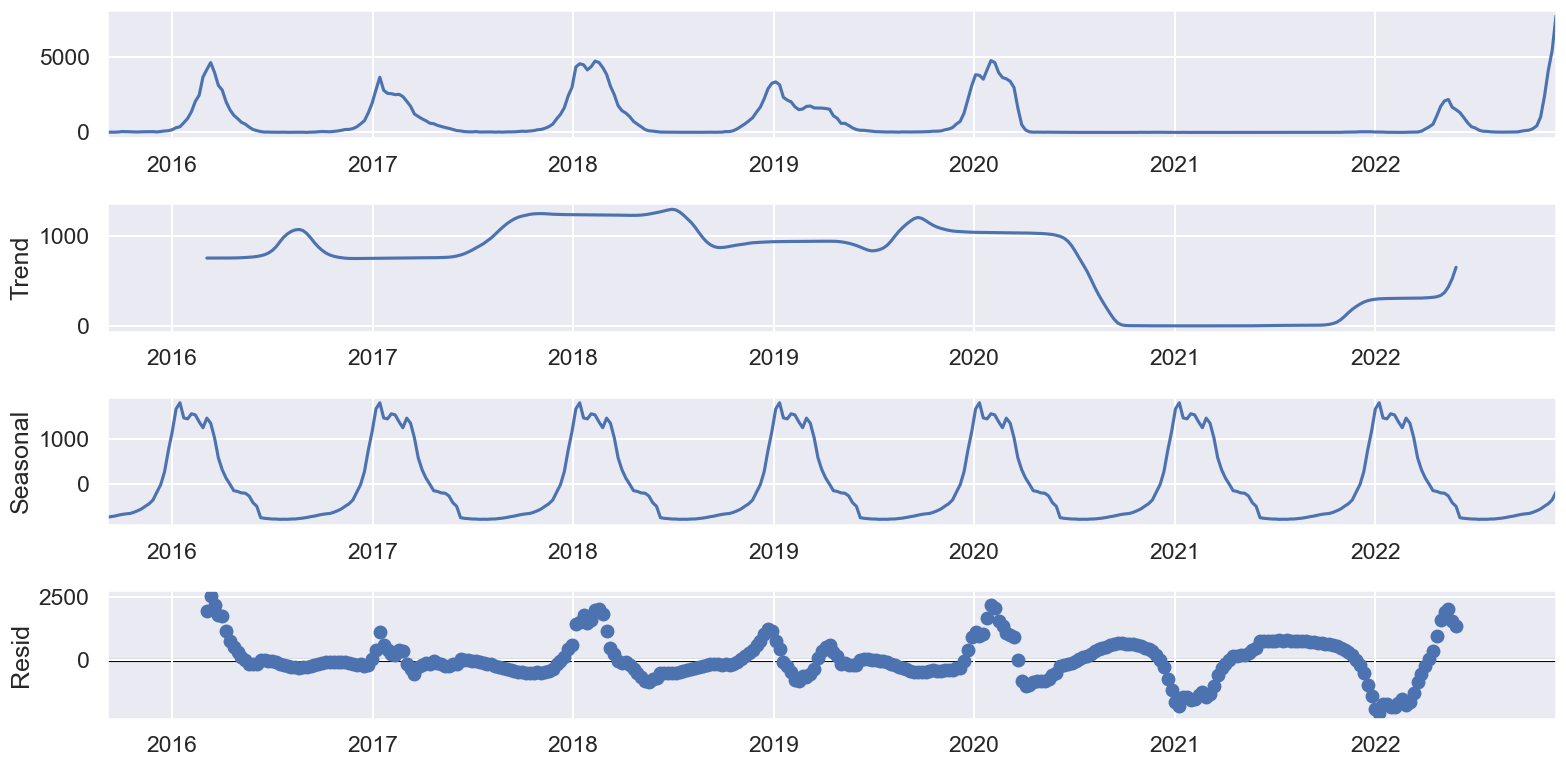

In [59]:
# Decomposition

result = seasonal_decompose(df_flu)
result.plot();

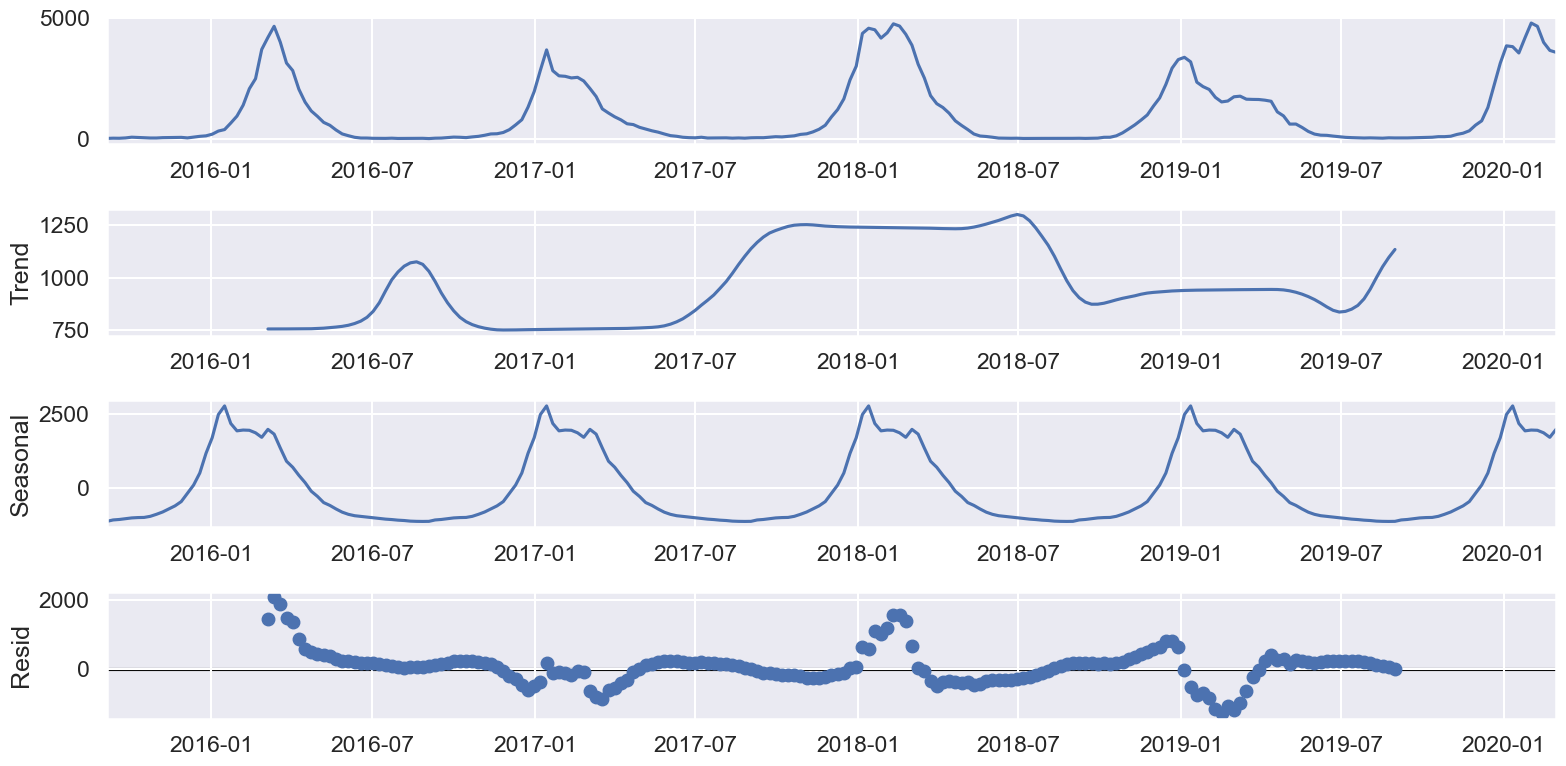

In [60]:
result = seasonal_decompose(df_flu_pre_COVID)
result.plot();

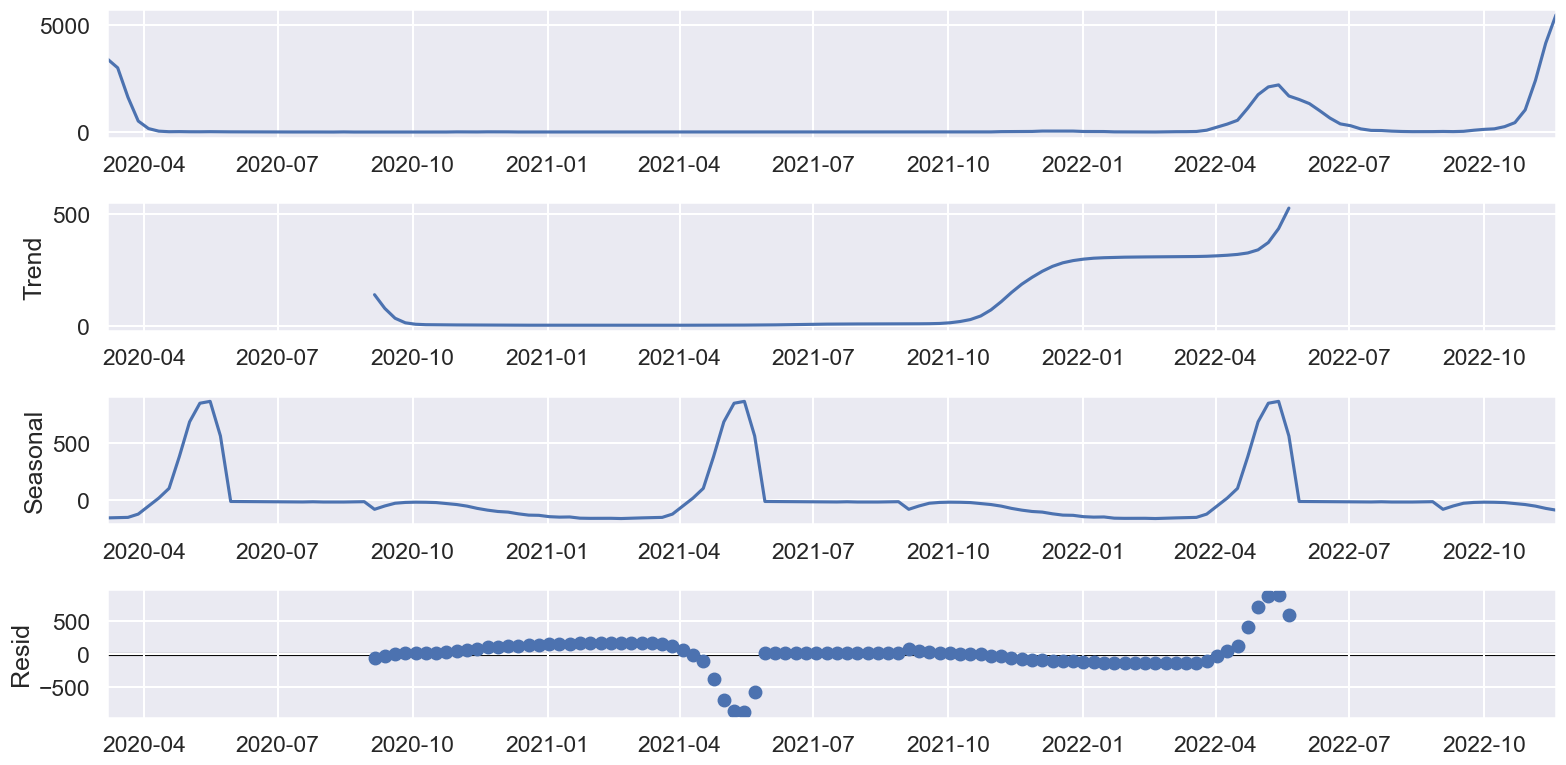

In [61]:
result = seasonal_decompose(df_flu_COVID)
result.plot();

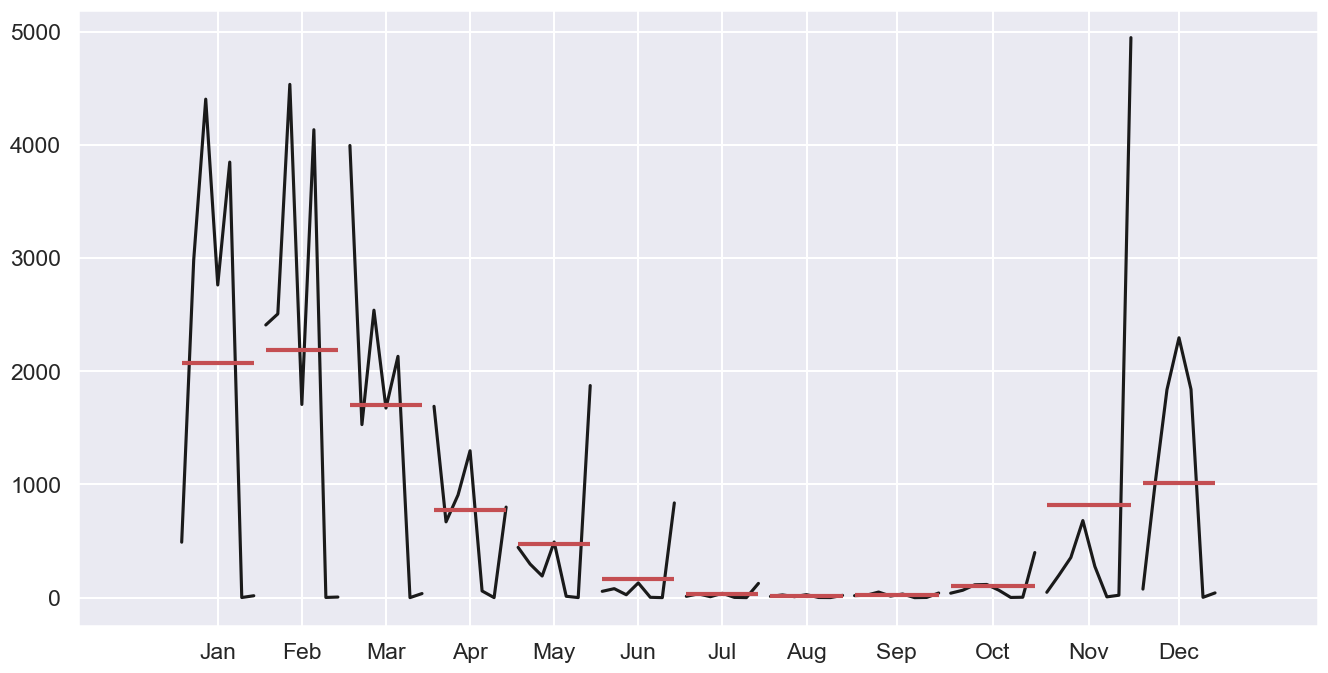

In [65]:
df_flu_month = df_flu.resample('M').mean()
month_plot(df_flu_month)
plt.show()

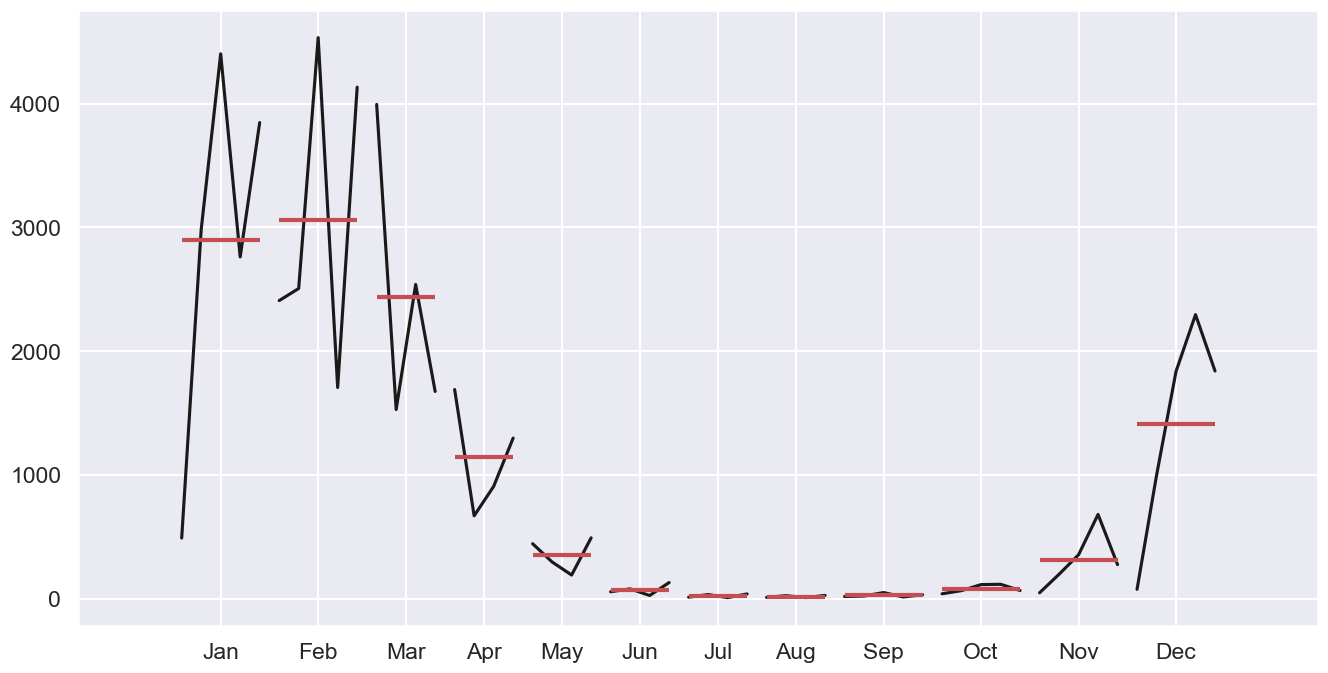

In [66]:
df_flu_pre_COVID_month = df_flu_pre_COVID.resample('M').mean()
month_plot(df_flu_pre_COVID_month)
plt.show()

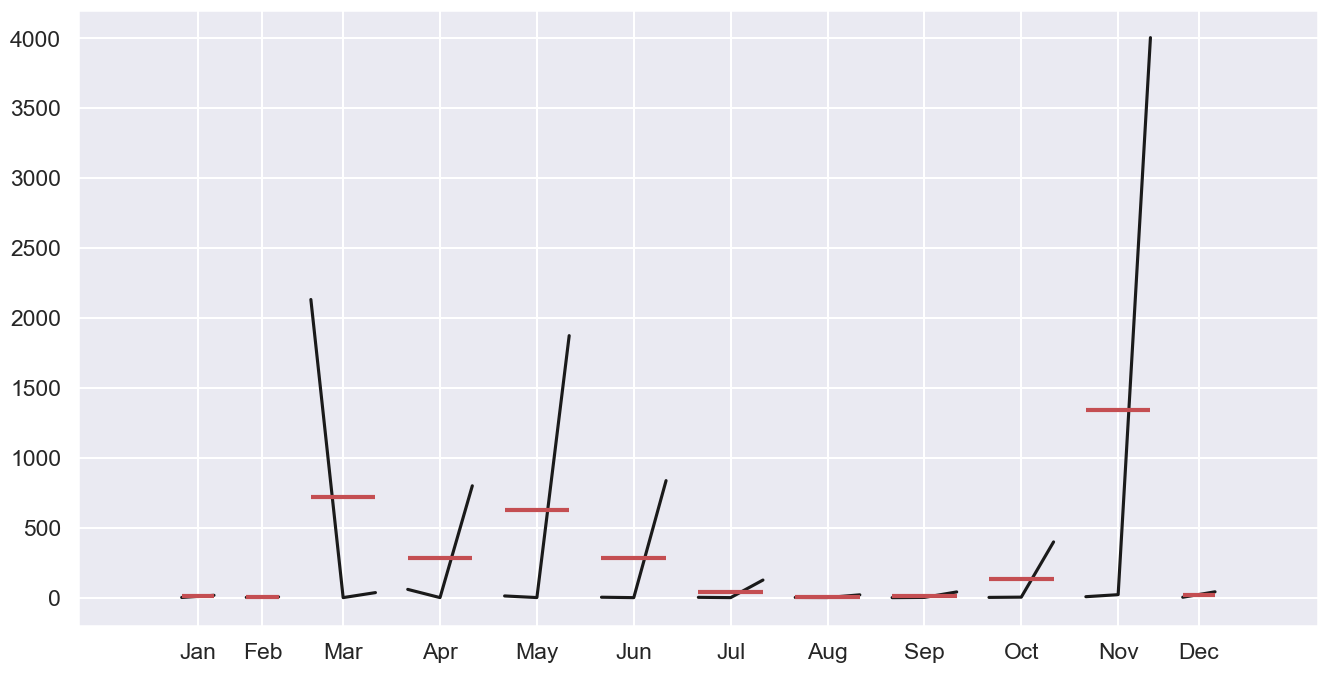

In [67]:
df_flu_COVID_month = df_flu_COVID.resample('M').mean()
month_plot(df_flu_COVID_month)
plt.show()

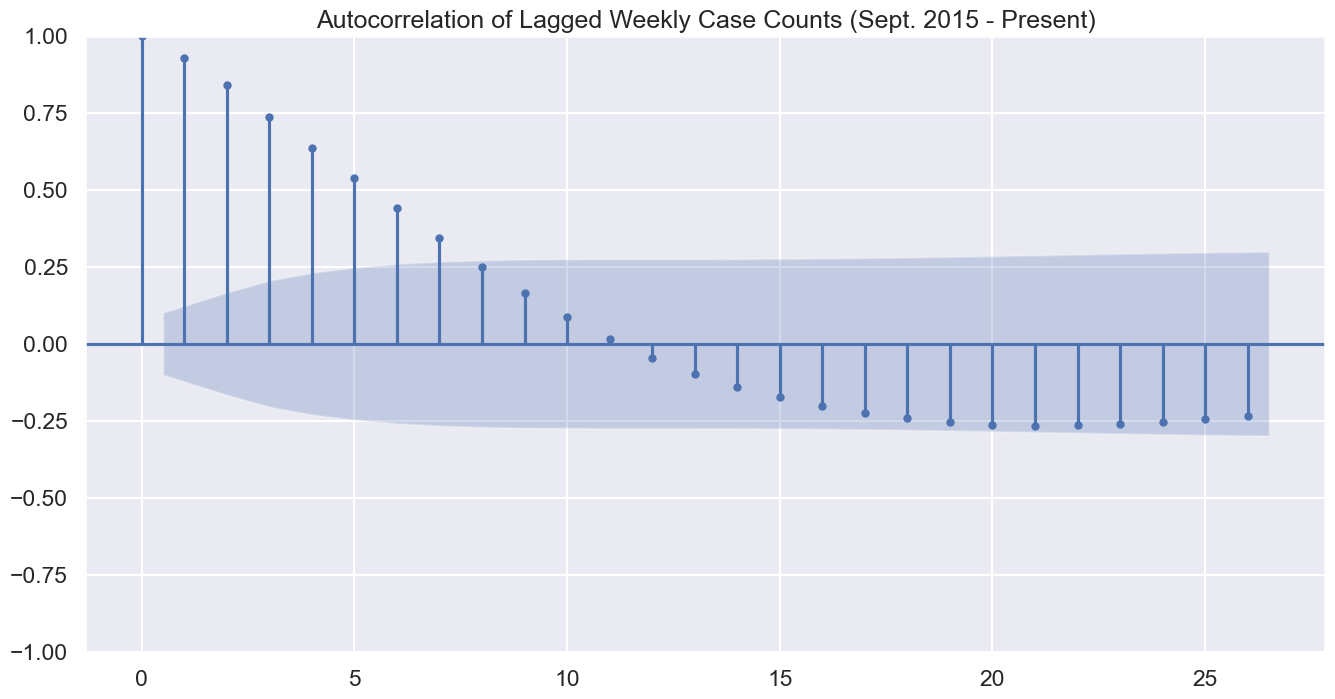

In [52]:
# Autocorrelation

plot_acf(df_flu, title = 'Autocorrelation of Lagged Weekly Case Counts (Sept. 2015 - Present)');

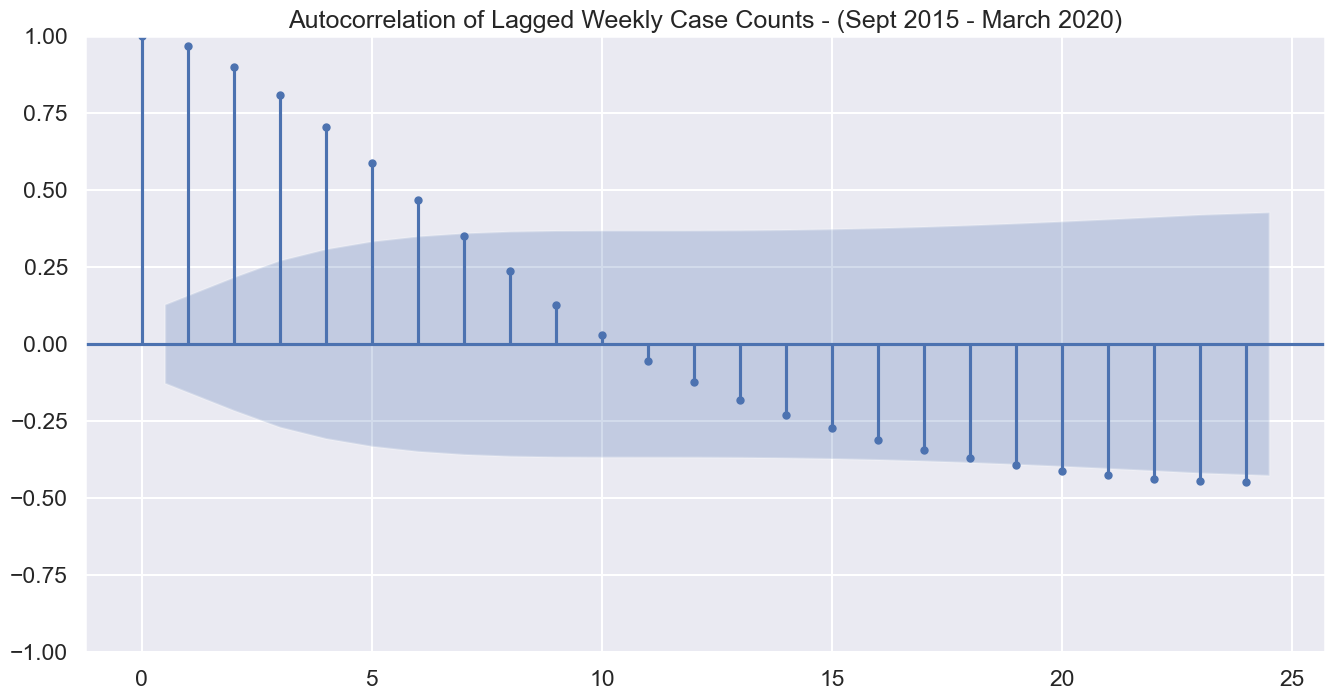

In [53]:
plot_acf(df_flu_pre_COVID, title = 'Autocorrelation of Lagged Weekly Case Counts - (Sept 2015 - March 2020)');

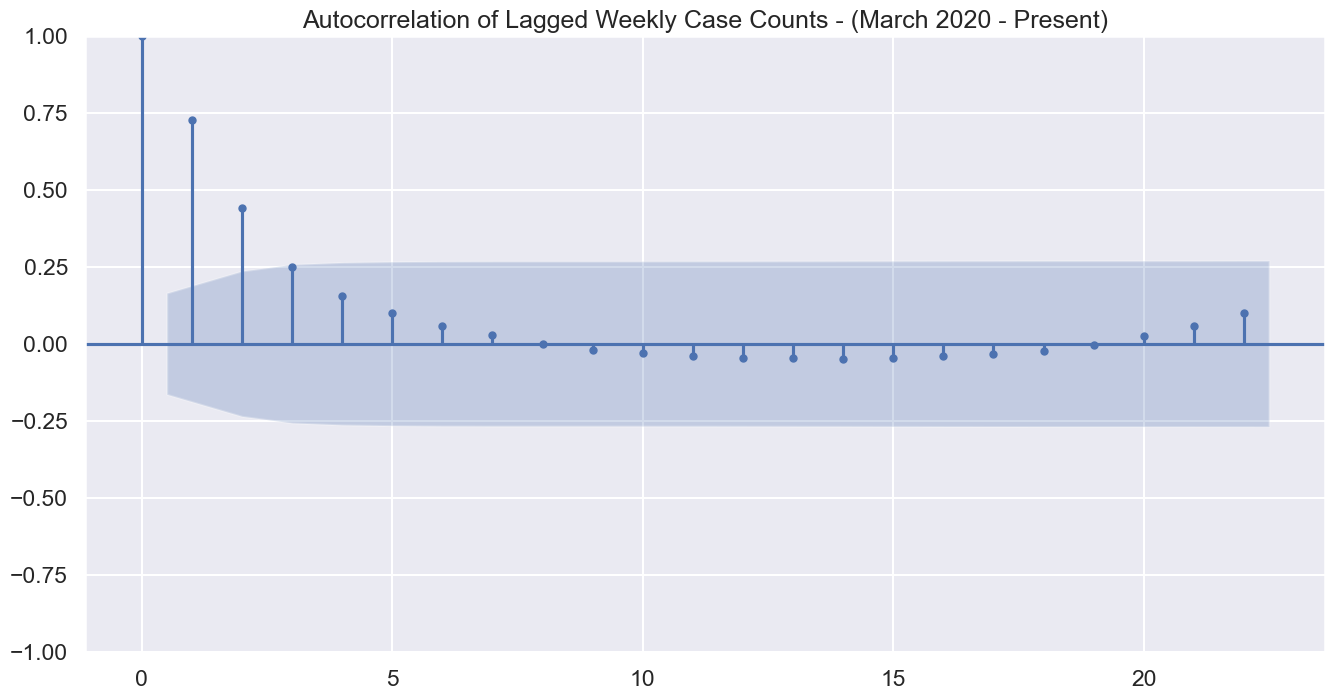

In [54]:
plot_acf(df_flu_COVID, title = 'Autocorrelation of Lagged Weekly Case Counts - (March 2020 - Present)');

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


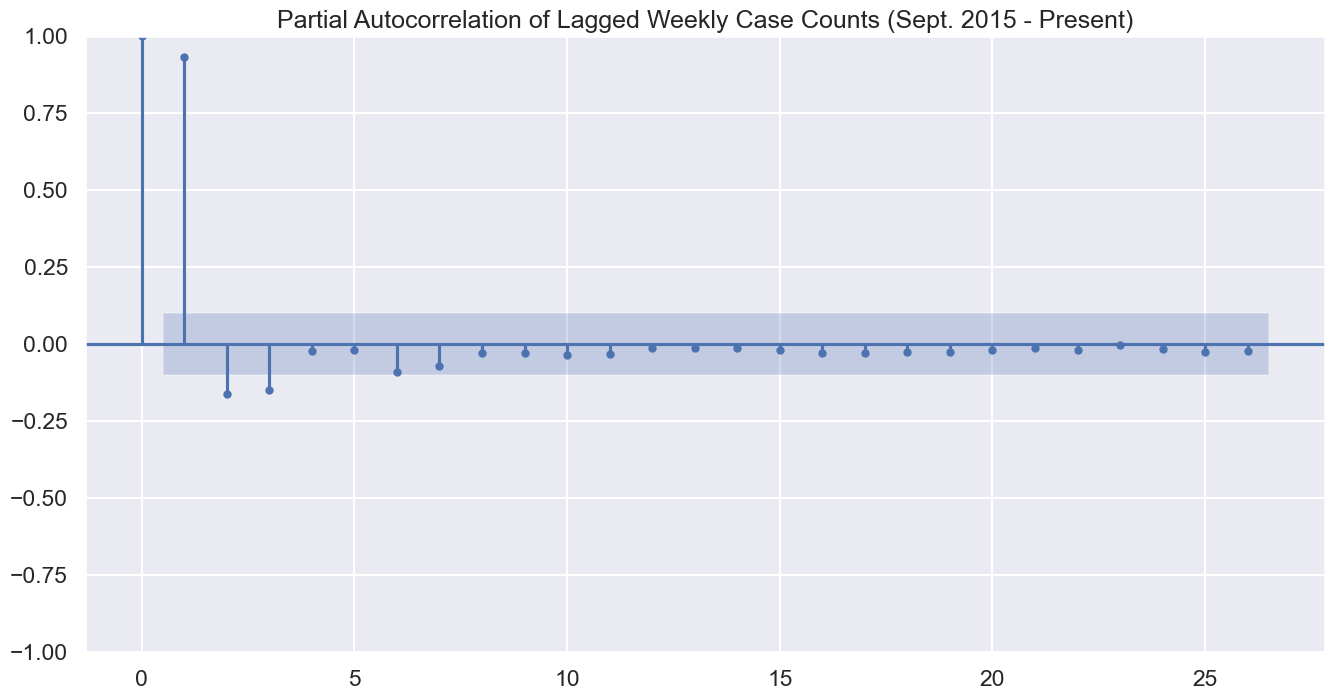

In [55]:
# Partial Autocorrelation

plot_pacf(df_flu, title = 'Partial Autocorrelation of Lagged Weekly Case Counts (Sept. 2015 - Present)');

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


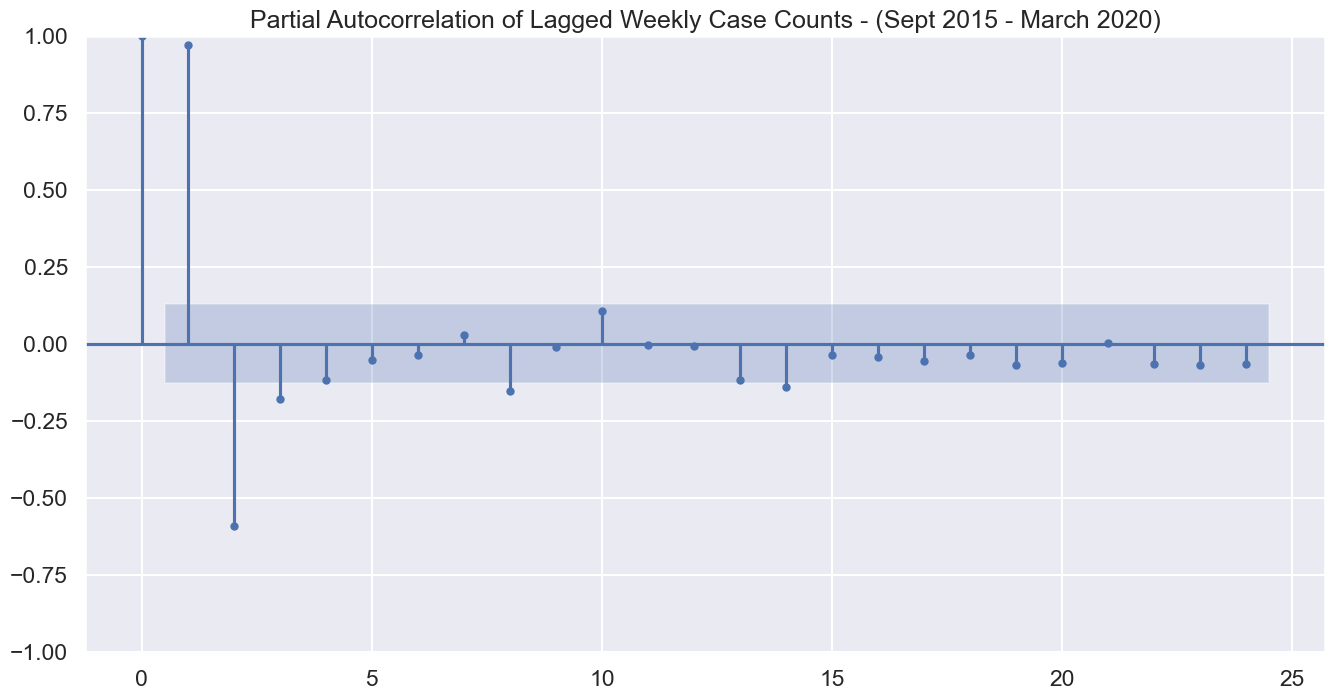

In [68]:
plot_pacf(df_flu_pre_COVID, title = 'Partial Autocorrelation of Lagged Weekly Case Counts - (Sept 2015 - March 2020)');

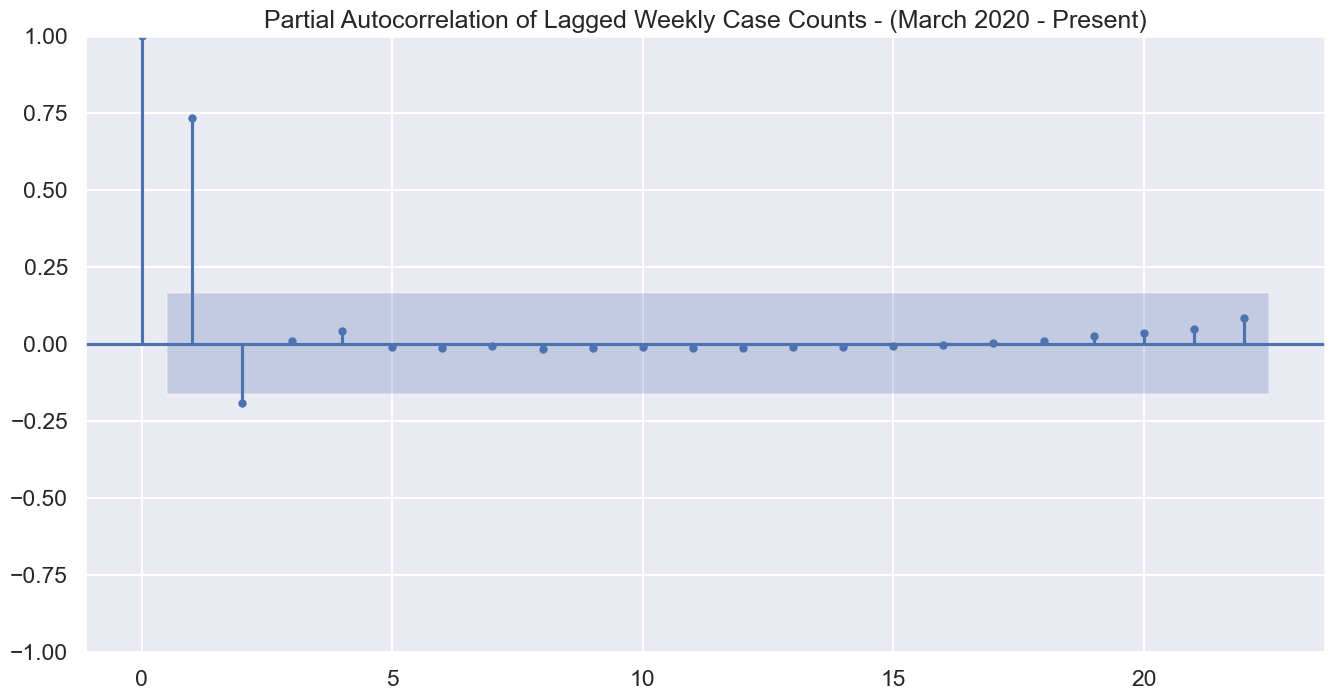

In [69]:
plot_pacf(df_flu_COVID, title = 'Partial Autocorrelation of Lagged Weekly Case Counts - (March 2020 - Present)');

In [12]:
# Dickey-Fuller Test

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_flu)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -3.123585026949767
ADF p-values: 0.024856314729563744
ADF number of lags used: 6
ADF number of observations: 371
ADF critical values: {'1%': -3.4480996560263386, '5%': -2.8693621113224137, '10%': -2.570937038891028}
ADF best information criterion: 4911.08356968373


In [13]:
df_flu = df_flu.reset_index()

In [14]:
df_flu.head()

,Week Ending,Total Cases
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0


In [15]:
df_test = df_flu

In [9]:
import pandas as pd
freq = 'D'
df_test['Next Week'] = df_test['Week Ending'] + pd.Timedelta(7, unit=freq)

In [10]:
df_test.set_index('Week Ending', inplace = True)
df_test.head()

,Total Cases,Next Week
Week Ending,,
2015-09-05,9.0,2015-09-12
2015-09-12,18.0,2015-09-19
2015-09-19,15.0,2015-09-26
2015-09-26,29.0,2015-10-03
2015-10-03,59.0,2015-10-10


In [11]:
df_test.loc['2015']

,Total Cases,Next Week
Week Ending,,
2015-09-05,9.0,2015-09-12
2015-09-12,18.0,2015-09-19
2015-09-19,15.0,2015-09-26
2015-09-26,29.0,2015-10-03
2015-10-03,59.0,2015-10-10
2015-10-10,50.0,2015-10-17
2015-10-17,37.0,2015-10-24
2015-10-24,26.0,2015-10-31
2015-10-31,26.0,2015-11-07


In [12]:
df_test.loc['2015-11-01':'2015-12-01']

,Total Cases,Next Week
Week Ending,,
2015-11-07,40.0,2015-11-14
2015-11-14,45.0,2015-11-21
2015-11-21,53.0,2015-11-28
2015-11-28,52.0,2015-12-05


In [13]:
df_test.drop(columns='Next Week', inplace = True)

In [14]:
df_test.to_period('M')

,Total Cases
Week Ending,
2015-09,9.0
2015-09,18.0
2015-09,15.0
2015-09,29.0
2015-10,59.0
...,...
2022-10,438.0
2022-10,1031.0
2022-11,2407.0


In [15]:
df_test.head()

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0


<AxesSubplot: xlabel='Week Ending'>

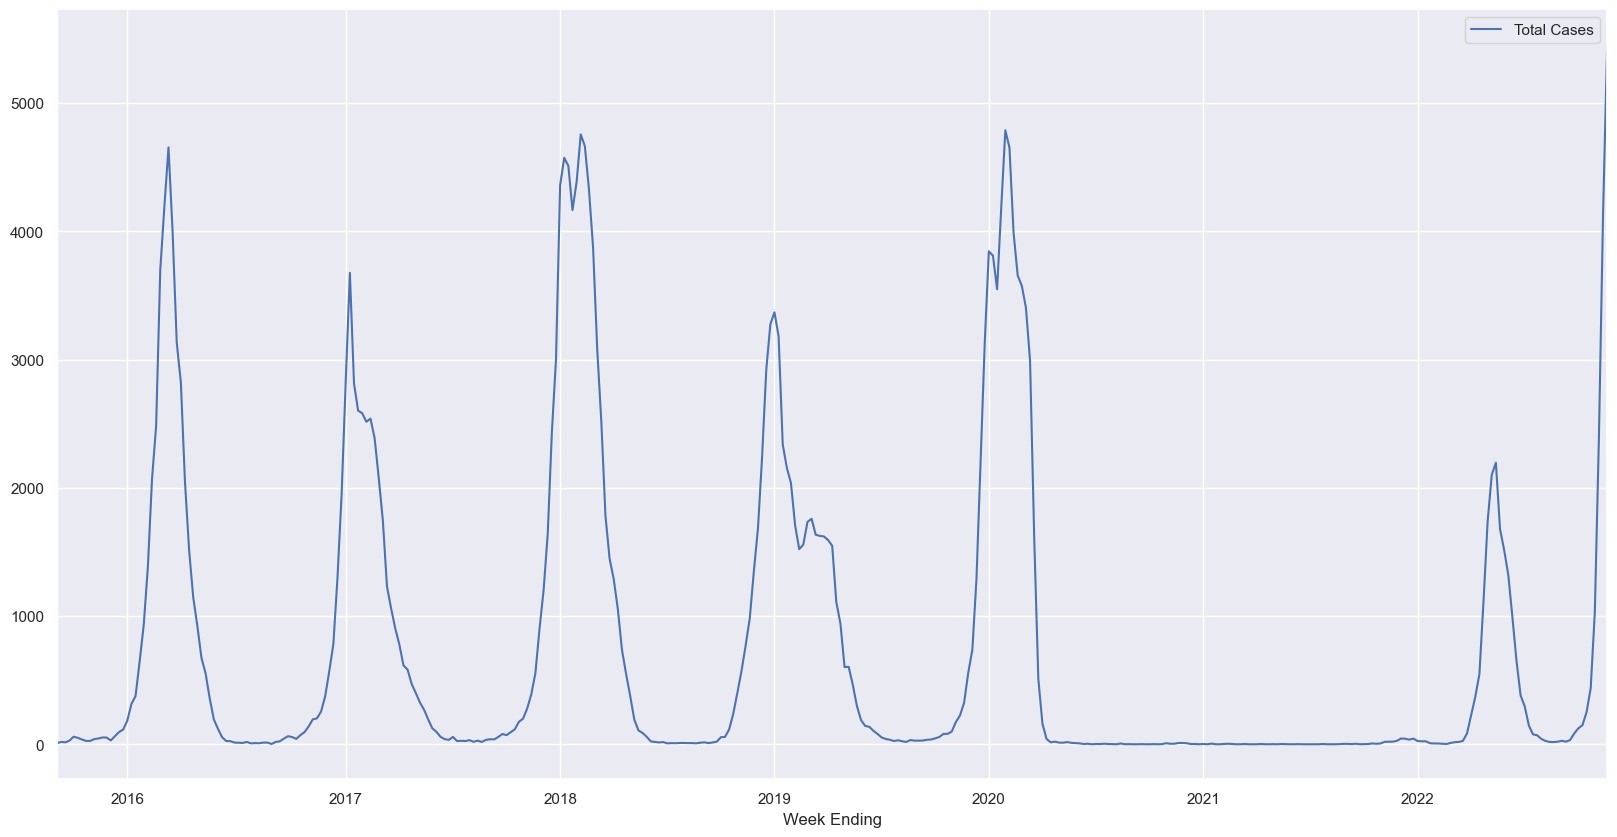

In [17]:
df_flu.plot()

In [18]:
df_flu.head(10)

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0
2015-10-10,50.0
2015-10-17,37.0
2015-10-24,26.0
2015-10-31,26.0


In [19]:
df_flu.asfreq('M', method='bfill') # only returns value at the end of the specified frequency if there's a data point faling on that date
# bfill fills the null values with the value from the next available time point
# ffill fills the null values with the value from the last availabe time point

,Total Cases
Week Ending,
2015-09-30,59.0
2015-10-31,26.0
2015-11-30,30.0
2015-12-31,183.0
2016-01-31,1386.0
...,...
2022-06-30,295.0
2022-07-31,26.0
2022-08-31,27.0


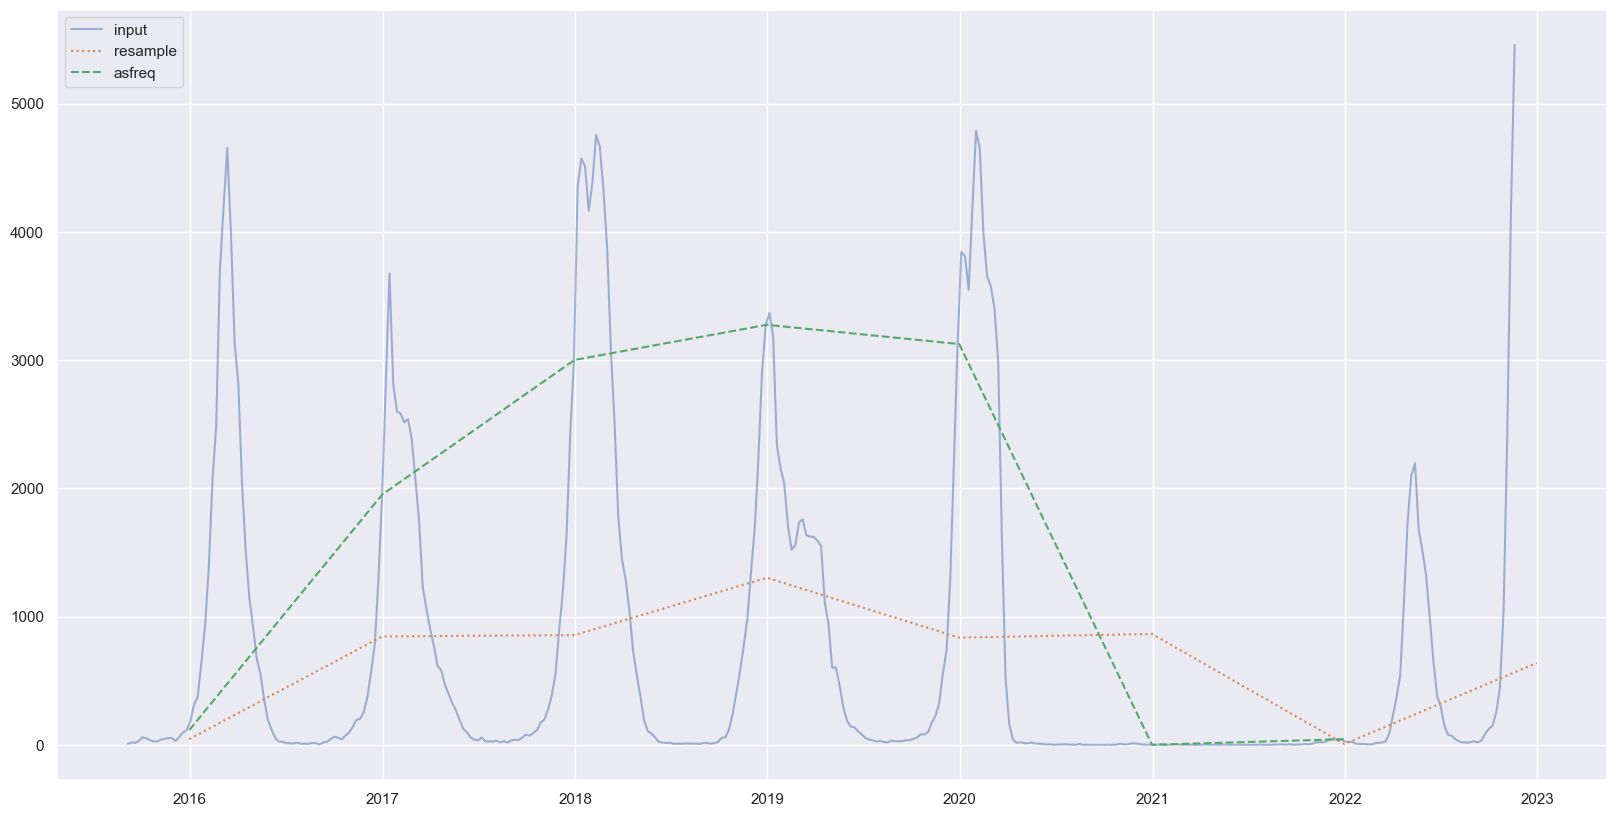

In [20]:
line1 = df_flu
line2 = df_flu.resample('A').mean()
line3 = df_flu.asfreq('A', method='ffill')
line4 = df_flu.asfreq('D', method='bfill')
plt.plot(line1, alpha = 0.5, linestyle = '-', label = 'input')
plt.plot(line2, linestyle = ':', label = 'resample')
plt.plot(line3, linestyle = '--', label = 'asfreq')
# plt.plot(line4, linestyle = '-.', label = 'asfreq_day')
plt.legend()

In [21]:
df_flu.shift(1) # moves data points forward one month

,Total Cases
Week Ending,
2015-09-05,NaN
2015-09-12,9.0
2015-09-19,18.0
2015-09-26,15.0
2015-10-03,29.0
...,...
2022-10-22,251.0
2022-10-29,438.0
2022-11-05,1031.0


In [22]:
# df_flu['t+1'] = df_flu.shift(1)
# df_flu.head()

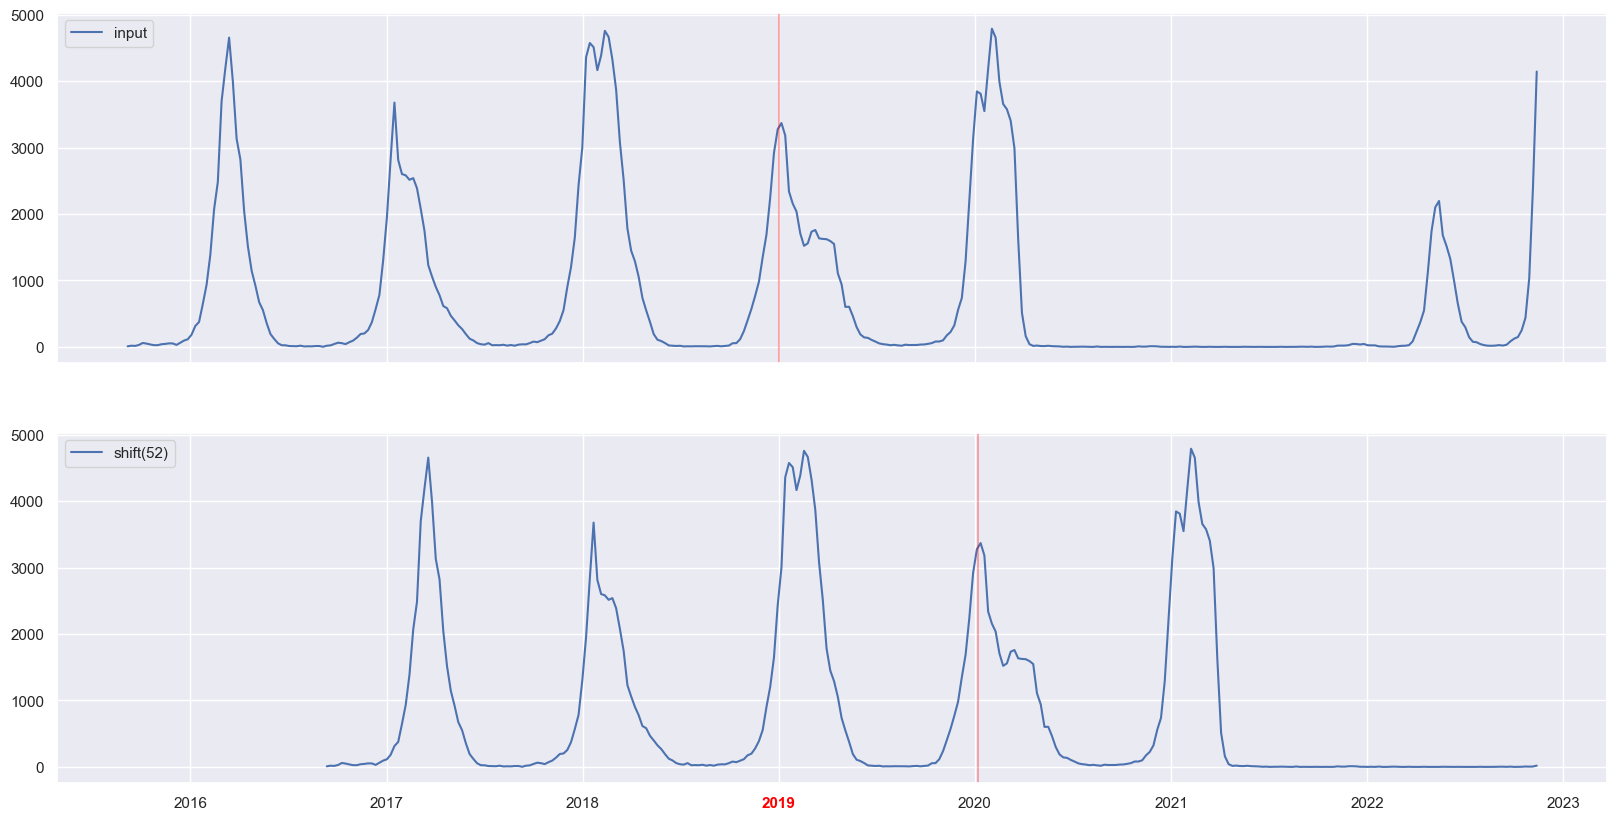

In [23]:
fig, ax = plt.subplots(2, sharex = True)
# apply a frequency to the data
df_flu = df_flu.asfreq('W', method='pad')

line1, = ax[0].plot(df_flu, label = 'input')
line2, = ax[1].plot(df_flu.shift(53), label = 'shift(52)')

#legends and annotations
local_max = pd.to_datetime('2019-01-01')
offset = pd.Timedelta(53, 'W')

ax[0].legend(loc=2)
# ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

In [24]:
df_flu

,Total Cases
Week Ending,
2015-09-06,9.0
2015-09-13,18.0
2015-09-20,15.0
2015-09-27,29.0
2015-10-04,59.0
...,...
2022-10-16,251.0
2022-10-23,438.0
2022-10-30,1031.0


In [25]:
df_flu.index

DatetimeIndex(['2015-09-06', '2015-09-13', '2015-09-20', '2015-09-27',
               '2015-10-04', '2015-10-11', '2015-10-18', '2015-10-25',
               '2015-11-01', '2015-11-08',
               ...
               '2022-09-11', '2022-09-18', '2022-09-25', '2022-10-02',
               '2022-10-09', '2022-10-16', '2022-10-23', '2022-10-30',
               '2022-11-06', '2022-11-13'],
              dtype='datetime64[ns]', name='Week Ending', length=376, freq='W-SUN')

In [26]:
df_flu.head()

,Total Cases
Week Ending,
2015-09-06,9.0
2015-09-13,18.0
2015-09-20,15.0
2015-09-27,29.0
2015-10-04,59.0


# Moving Average as a Data Preparation Method

In [27]:
rolling = df_flu['Total Cases'].rolling(2)

In [28]:
df_flu['2-week moving average'] = rolling.mean()
df_flu['2-week moving std'] = rolling.std()
df_flu.head(10)

,Total Cases,2-week moving average,2-week moving std
Week Ending,,,
2015-09-06,9.0,NaN,NaN
2015-09-13,18.0,13.5,6.363961
2015-09-20,15.0,16.5,2.121320
2015-09-27,29.0,22.0,9.899495
2015-10-04,59.0,44.0,21.213203
2015-10-11,50.0,54.5,6.363961
2015-10-18,37.0,43.5,9.192388
2015-10-25,26.0,31.5,7.778175
2015-11-01,26.0,26.0,0.000000


In [29]:
import statistics
statistics.mean([18,15])

16.5

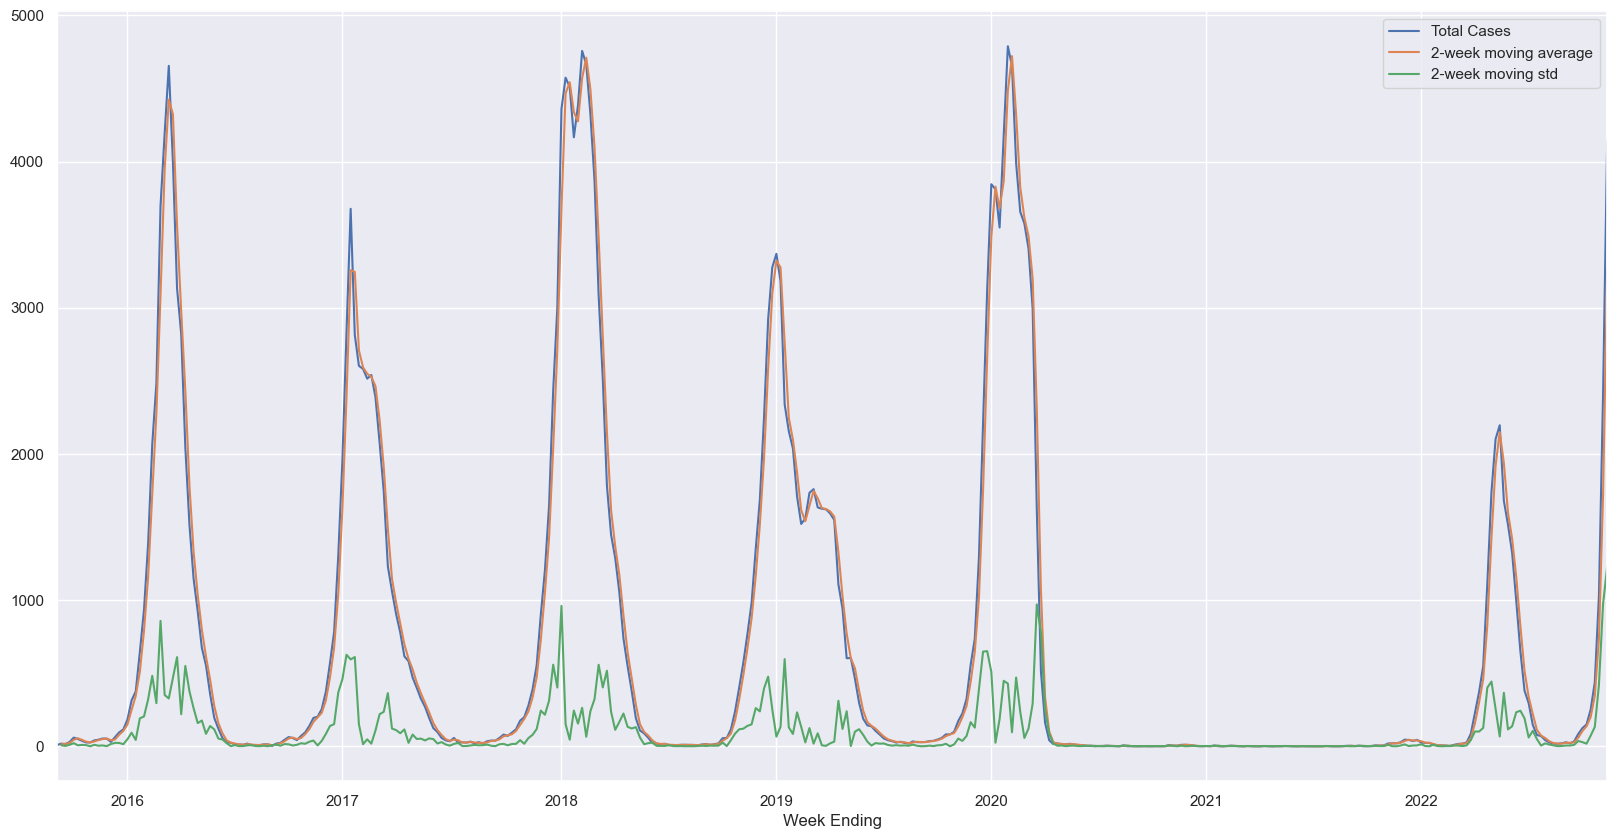

In [30]:
ax = df_flu.plot()

In [31]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

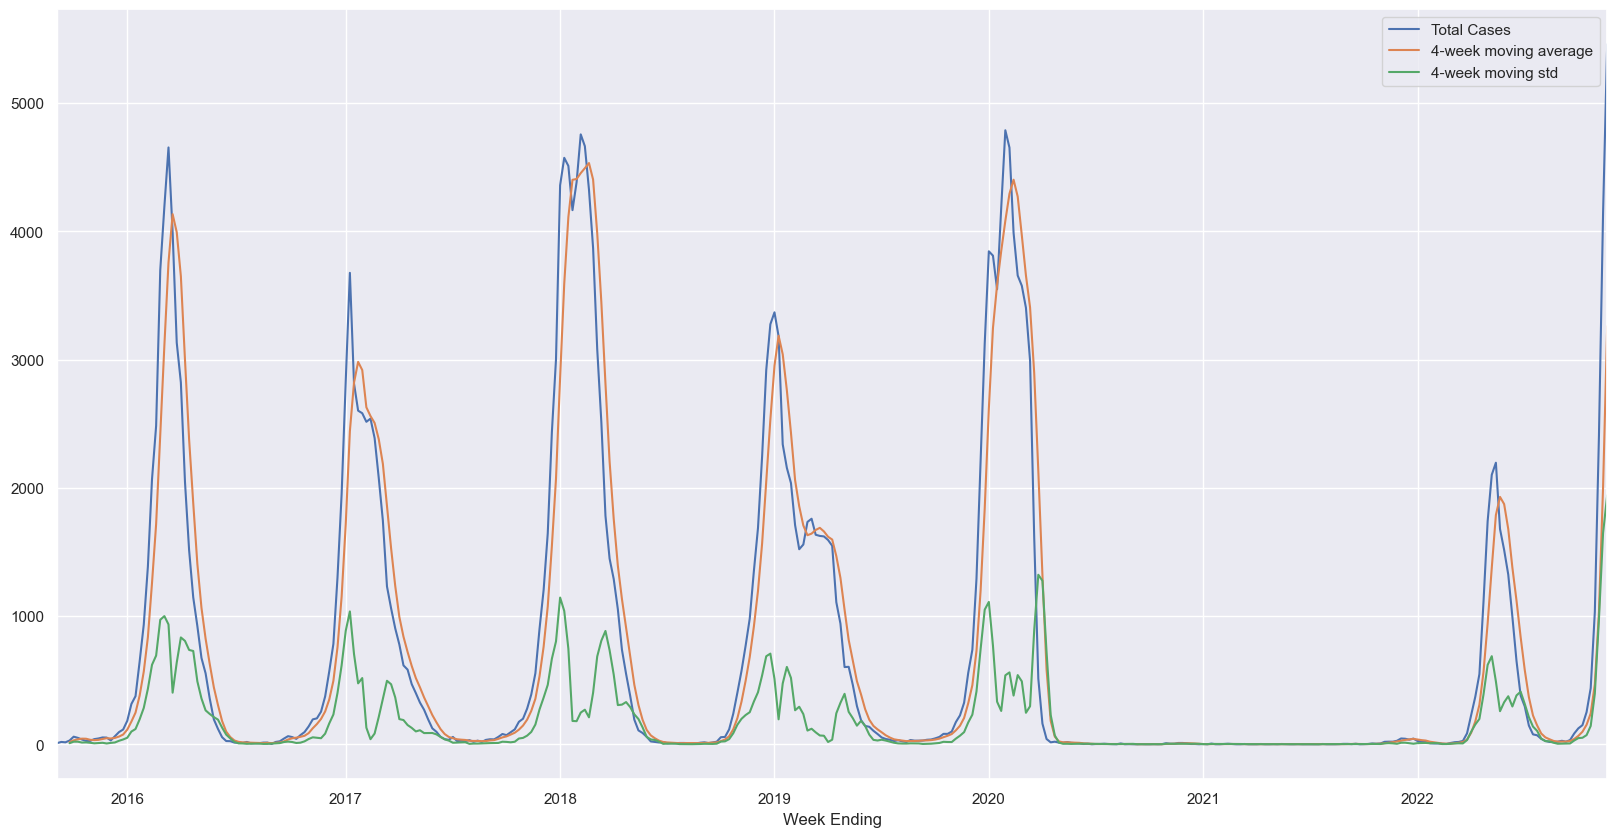

In [32]:
rolling = df_flu['Total Cases'].rolling(4)
df_flu['4-week moving average'] = rolling.mean()
df_flu['4-week moving std'] = rolling.std()
ax = df_flu.plot()

In [33]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

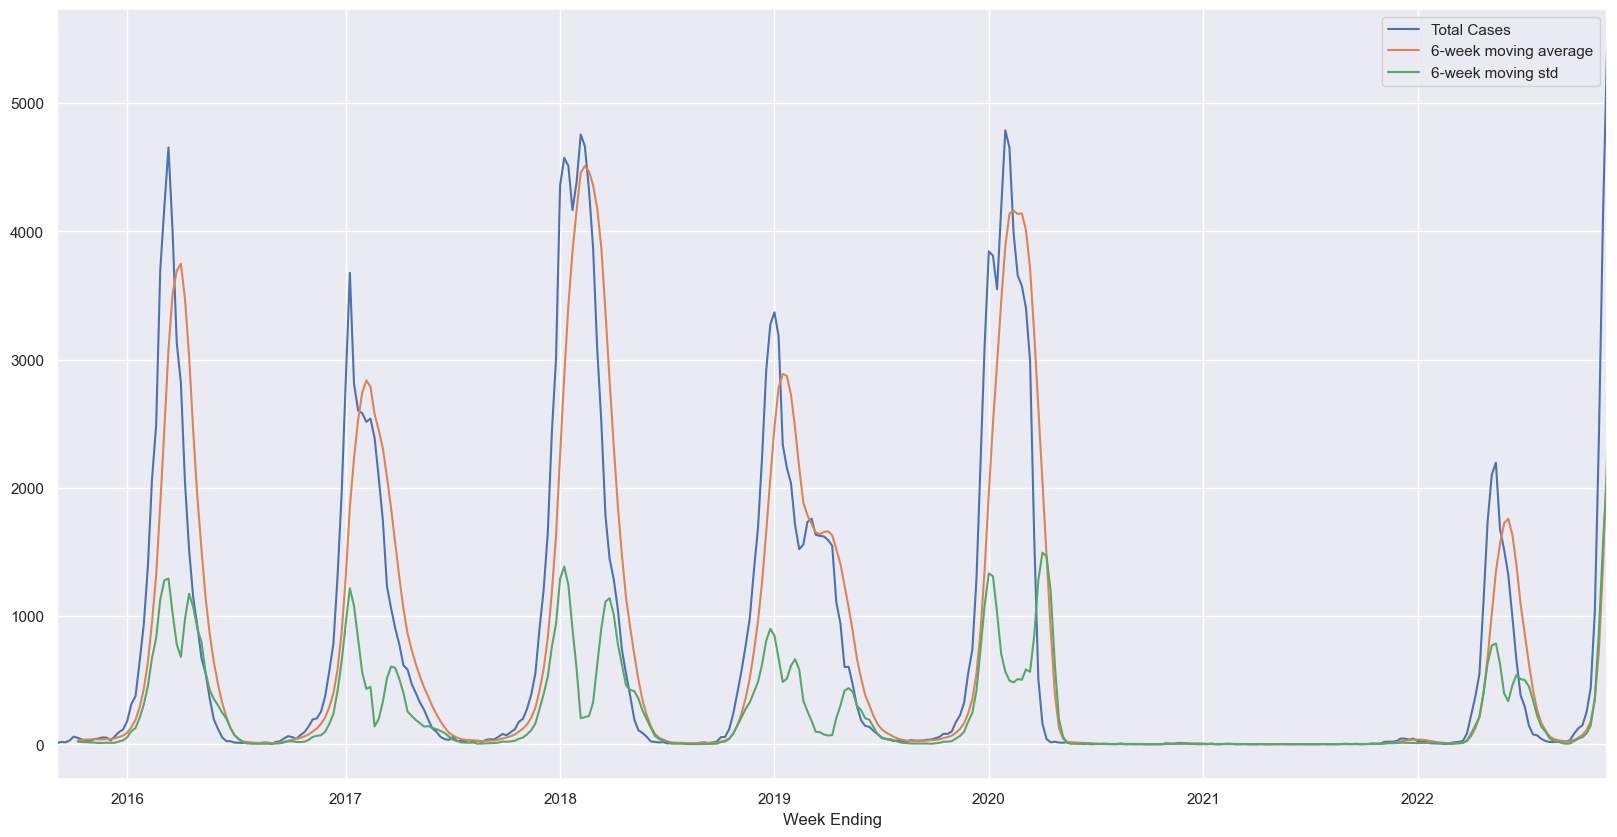

In [34]:
rolling = df_flu['Total Cases'].rolling(6)
df_flu['6-week moving average'] = rolling.mean()
df_flu['6-week moving std'] = rolling.std()
ax = df_flu.plot()

In [35]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

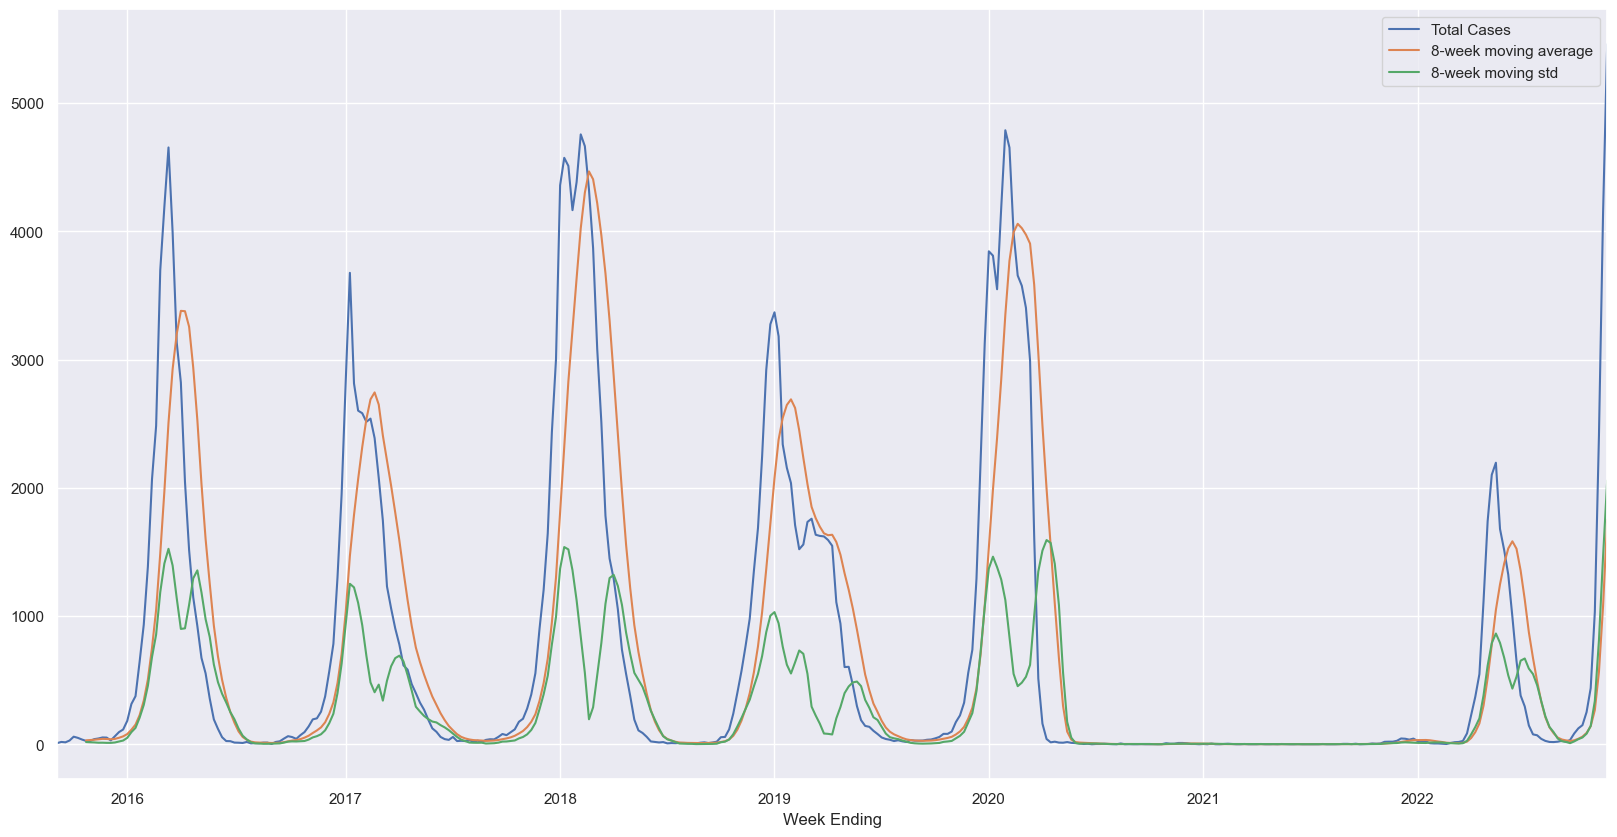

In [36]:
rolling = df_flu['Total Cases'].rolling(8)
df_flu['8-week moving average'] = rolling.mean()
df_flu['8-week moving std'] = rolling.std()
ax = df_flu.plot()

In [37]:
df_flu.head(20)

,Total Cases,8-week moving average,8-week moving std
Week Ending,,,
2015-09-05,9.0,NaN,NaN
2015-09-12,18.0,NaN,NaN
2015-09-19,15.0,NaN,NaN
2015-09-26,29.0,NaN,NaN
2015-10-03,59.0,NaN,NaN
2015-10-10,50.0,NaN,NaN
2015-10-17,37.0,NaN,NaN
2015-10-24,26.0,30.375,17.385852
2015-10-31,26.0,32.500,15.315725


In [38]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

# Moving Average as Feature Engineering

In [39]:
width = 2
lag1 = df_flu.shift(1)
lag2 = df_flu.shift(width-1)
window = lag2.rolling(window=width)
moving_average = window.mean()
df_flu['2-week Moving Average'] = moving_average
df_flu['t - 1'] = lag1
df_flu.head()

,Total Cases,2-week Moving Average,t - 1
Week Ending,,,
2015-09-05,9.0,NaN,NaN
2015-09-12,18.0,NaN,9.0
2015-09-19,15.0,13.5,18.0
2015-09-26,29.0,16.5,15.0
2015-10-03,59.0,22.0,29.0


In [40]:
# baseline / level = average value

a = round(df_flu_pre_COVID['Total Cases'].mean())
b = round(df_flu_COVID['Total Cases'].mean())
c = round(df_flu['Total Cases'].mean())

print(f'Baseline flu level from September 2015 to March 2020 was approximately {a} laboratory-confirmed cases per week.')
print(f'Baseline flu level from March 2020 to to present was approximately {b} laboratory-confirmed cases per week.')
print(f'Baseline flu level from September 2015 to to present was approximately {c} laboratory-confirmed cases per week.')

Baseline flu level from September 2015 to March 2020 was approximately 1010 laboratory-confirmed cases per week.
Baseline flu level from March 2020 to to present was approximately 276 laboratory-confirmed cases per week.
Baseline flu level from September 2015 to to present was approximately 733 laboratory-confirmed cases per week.


In [37]:
# baseline / level = average value

a = round(df_flu_pre_COVID['Total Cases'].std())
b = round(df_flu_COVID['Total Cases'].std())
c = round(df_flu['Total Cases'].std())

print(f'Standard Deviation of Flu Cases from September 2015 to March 2020 was approximately {a} laboratory-confirmed cases per week.')
print(f'Standard Deviation of Flu Cases from March 2020 to to present was approximately {b} laboratory-confirmed cases per week.')
print(f'Standard Deviation of Flu Cases from September 2015 to to present was approximately {c} laboratory-confirmed cases per week.')

Standard Deviation of Flu Cases from September 2015 to March 2020 was approximately 1359 laboratory-confirmed cases per week.
Standard Deviation of Flu Cases from March 2020 to to present was approximately 796 laboratory-confirmed cases per week.
Standard Deviation of Flu Cases from September 2015 to to present was approximately 1281 laboratory-confirmed cases per week.


In [34]:
# descriptive statistics
df_flu_pre_COVID.describe()

,Total Cases
count,235.000000
mean,1009.944681
std,1358.688662
min,2.000000
25%,37.500000
50%,238.000000
75%,1629.500000
max,4789.000000


In [35]:
df_flu_COVID.describe()

,Total Cases
count,142.000000
mean,275.971831
std,795.984193
min,0.000000
25%,1.000000
50%,6.000000
75%,41.750000
max,5460.000000


In [36]:
df_flu.describe()

,A(H1N1)pdm09,A(H3N2),A(Unsubtyped),Influenza B,Total Cases
count,378.000000,378.000000,378.000000,378.000000,378.000000
mean,78.190476,136.177249,353.965608,183.777778,752.111111
std,212.544545,321.880636,653.132754,454.682486,1280.766037
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.000000,2.000000,10.000000
50%,2.000000,17.000000,16.500000,7.000000,57.000000
75%,29.000000,93.000000,369.750000,76.500000,971.000000
max,1391.000000,2265.000000,5424.000000,2443.000000,7773.000000


In [16]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu.pkl", "rb" ))

In [17]:
df_flu.head()

,Surveillance Week,A(H1N1)pdm09,A(H3N2),A(Unsubtyped),Influenza B,Year,Total Cases,Epiweek,Week Ending
0,35,1.0,2.0,3.0,3.0,2015,9.0,201535,2015-09-05
1,36,2.0,11.0,5.0,0.0,2015,18.0,201536,2015-09-12
2,37,0.0,10.0,4.0,1.0,2015,15.0,201537,2015-09-19
3,38,0.0,16.0,13.0,0.0,2015,29.0,201538,2015-09-26
4,39,6.0,34.0,13.0,6.0,2015,59.0,201539,2015-10-03


In [18]:
df_flu = df_flu.set_index('Week Ending')
df_flu = df_flu.drop(columns = ['Surveillance Week', 'Year', 'Epiweek'])

In [19]:
df_flu.head()

,A(H1N1)pdm09,A(H3N2),A(Unsubtyped),Influenza B,Total Cases
Week Ending,,,,,
2015-09-05,1.0,2.0,3.0,3.0,9.0
2015-09-12,2.0,11.0,5.0,0.0,18.0
2015-09-19,0.0,10.0,4.0,1.0,15.0
2015-09-26,0.0,16.0,13.0,0.0,29.0
2015-10-03,6.0,34.0,13.0,6.0,59.0


In [32]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu.pkl", "rb" ))
df_flu = df_flu.set_index('Week Ending')
df_flu
df_flu = df_flu.iloc[:,[1,2,3,4,6]]

Text(0.5, 1.0, 'Influenza Cases in Canada by Subtype')

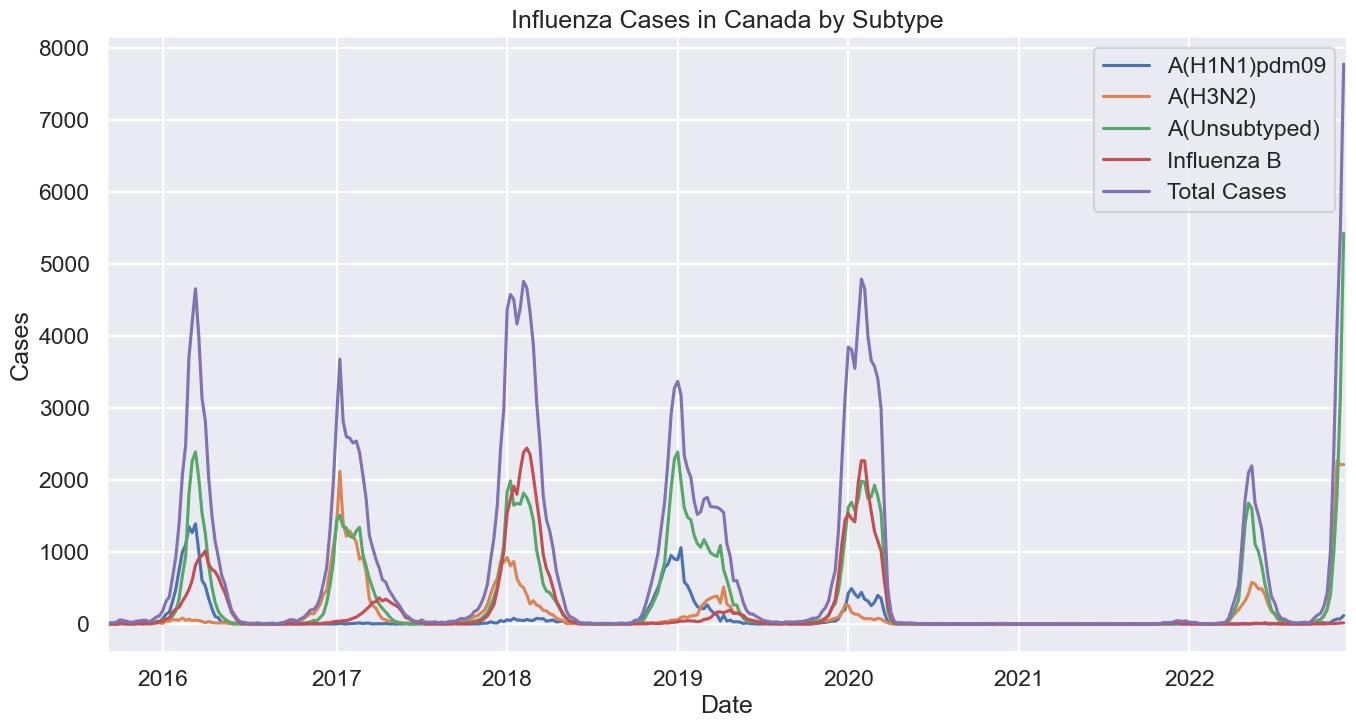

In [33]:

df_flu.plot()
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Influenza Cases in Canada by Subtype')